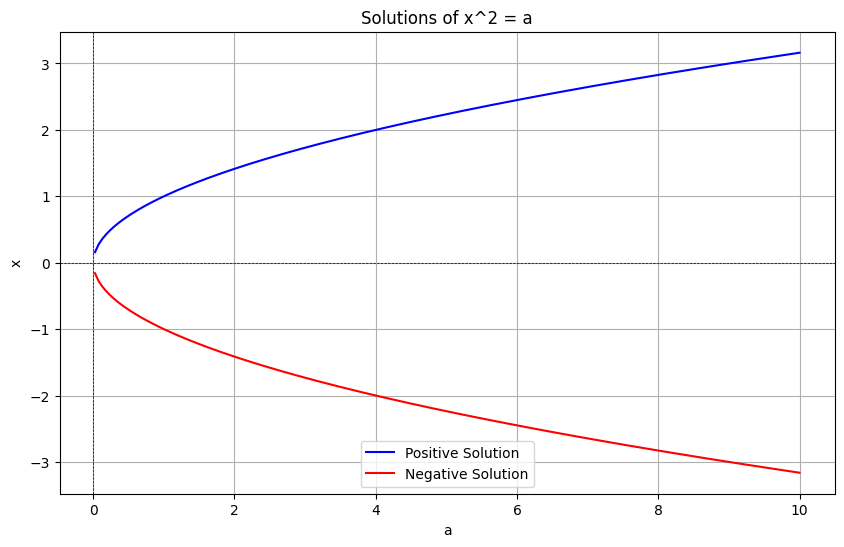

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 변수 선언
x, a = sp.symbols('x a')

# 방정식 정의
equation = x**2 - a

# 특정 a 값에 대한 방정식의 해를 구하는 함수
def solve_equation(a_value):
    eq = equation.subs(a, a_value)
    initial_guess_pos = 1  # 양의 해에 대한 초기 추정값
    initial_guess_neg = -1  # 음의 해에 대한 초기 추정값
    solution_pos = sp.nsolve(eq, x, initial_guess_pos)
    solution_neg = sp.nsolve(eq, x, initial_guess_neg)
    return float(solution_pos), float(solution_neg)

# a 값의 범위를 설정
a_values = np.linspace(-10, 10, 400)
solutions_pos = []
solutions_neg = []

# 각 a 값에 대해 방정식의 해를 구함
for a_value in a_values:
    try:
        sol_pos, sol_neg = solve_equation(a_value)
        solutions_pos.append(sol_pos)
        solutions_neg.append(sol_neg)
    except:
        # nsolve가 실패할 경우 무시하고 넘어감
        solutions_pos.append(np.nan)
        solutions_neg.append(np.nan)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(a_values, solutions_pos, label='Positive Solution', color='blue')
plt.plot(a_values, solutions_neg, label='Negative Solution', color='red')
plt.xlabel('a')
plt.ylabel('x')
plt.title('Solutions of x^2 = a')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

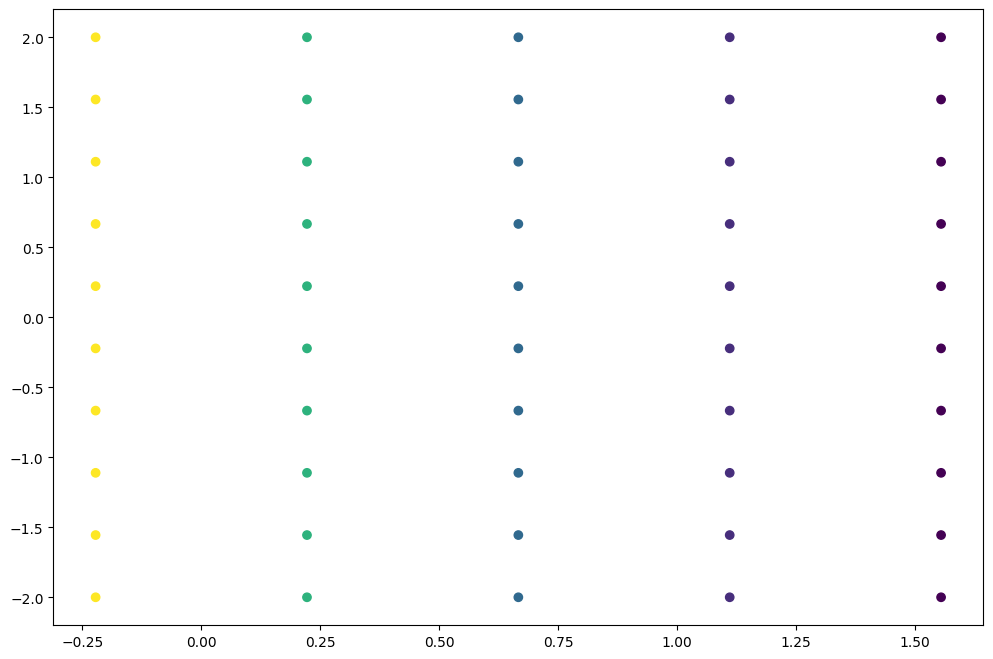

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 변수 선언
phi, alpha, beta = sp.symbols('phi alpha beta')

# 임의의 함수 f(phi, alpha, beta) 정의
f = sp.sin(phi) + alpha * sp.cos(phi) + beta

# 함수의 도함수 df(phi, alpha, beta) 정의
df = sp.diff(f, phi)

# 안정 및 불안정 고정점을 찾는 함수
def find_fixed_points(alpha_value, beta_value):
    # alpha와 beta 값을 대입한 도함수
    df_subs = df.subs({alpha: alpha_value, beta: beta_value})
    
    # 고정점을 찾기 위해 도함수가 0이 되는 값을 풀이
    fixed_points = sp.solveset(df_subs, phi, domain=sp.Interval(0, sp.pi))
    
    stable_points = []
    unstable_points = []
    
    for point in fixed_points:
        # 고정점 근처에서 도함수의 부호를 검사
        df_minus_eps = df_subs.subs(phi, point - 1e-5)
        df_plus_eps = df_subs.subs(phi, point + 1e-5)
        
        if df_minus_eps > 0 and df_plus_eps < 0:
            stable_points.append(point.evalf())
        elif df_minus_eps < 0 and df_plus_eps > 0:
            unstable_points.append(point.evalf())
    
    return stable_points, unstable_points

# 파라미터 범위 설정
alpha_values = np.linspace(-2, 2, 10)
beta_values = np.linspace(-2, 2, 10)

# Phase diagram을 위한 데이터 저장
stable_phi = []
unstable_phi = []

# 각 alpha, beta 값에 대해 고정점을 찾음
for alpha_value in alpha_values:
    for beta_value in beta_values:
        stable_points, unstable_points = find_fixed_points(alpha_value, beta_value)
        
        for point in stable_points:
            stable_phi.append((alpha_value, beta_value, point))
        
        for point in unstable_points:
            unstable_phi.append((alpha_value, beta_value, point))

# 안정 고정점 시각화
stable_phi = np.array(stable_phi)
unstable_phi = np.array(unstable_phi)

plt.figure(figsize=(12, 8))
plt.scatter(stable_phi[:, 0], stable_phi[:, 1], c=stable_phi[:, 2], cmap='viridis', label='Stable Fixed Points', marker='o')
plt.scatter(unstable_phi[:, 0], unstable_phi[:, 1], c=unstable_phi[:, 2], cmap='plasma', label='Unstable Fixed Points', marker='x')
plt.colorbar(label='phi')
plt.xlabel('alpha')
plt.ylabel('beta')
plt.title('Phase Diagram')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def f(phi,alpha,beta):
    -(2*beta**2*(beta**2*((2*cos(phi)**2 - 1)*cos(alpha) + 2*sin(alpha)*sin(phi)*cos(phi)) - cos(alpha))*sin(phi)*cos(phi) + (beta**4*(2*sin(alpha)*cos(alpha) - 8*sin(phi)**3*cos(phi) + 4*sin(phi)*cos(phi)) - 2*sin(alpha)*cos(alpha))*cos(alpha))

## 이전 논문에서 찾은 fixed point 확인

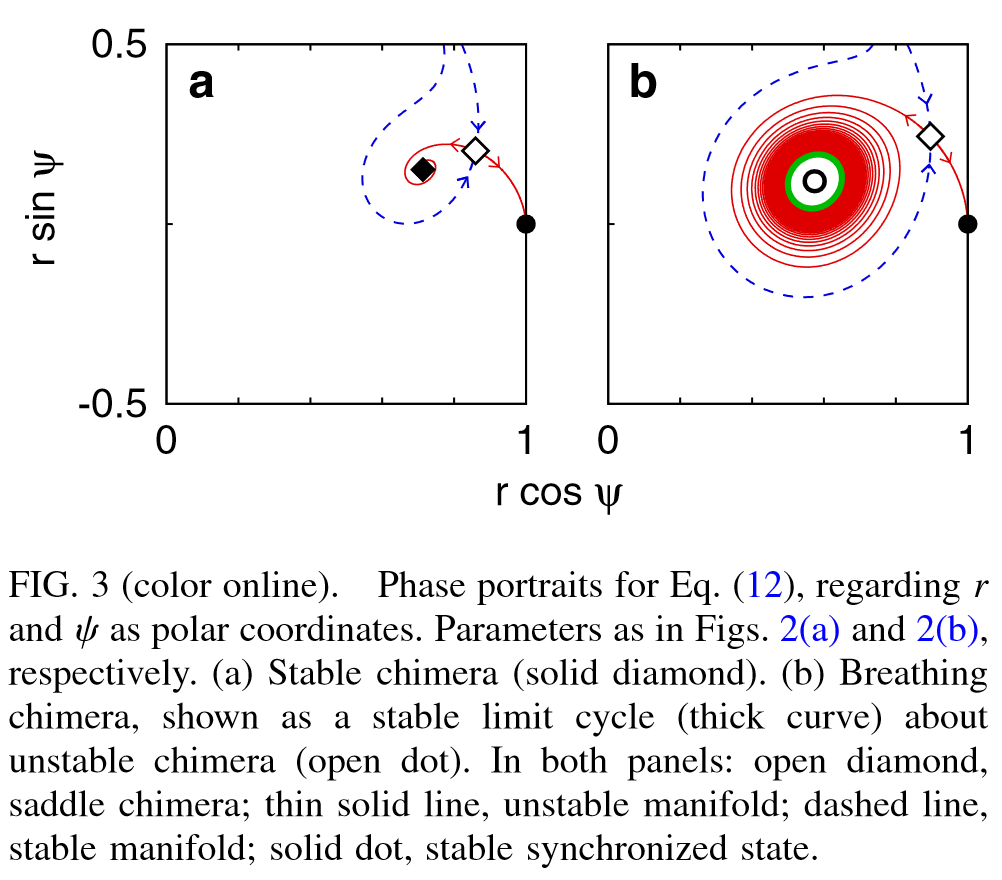

In [139]:
import sympy as sp
from scipy.optimize import fsolve
import numpy as np

In [148]:
r = sp.symbols('r', real = True)
psi = sp.symbols('psi', real = True)
mu,nu,alpha = sp.symbols('mu nu alpha',real=True)
X,Y = sp.symbols('X Y')

In [149]:
dr = (1-r**2)*(mu*r*sp.cos(alpha)+nu*sp.cos(alpha-psi))
dpsi = (1+r**2)/(2*r)*(mu*r*sp.sin(alpha)-nu*sp.sin(psi-alpha)) - mu*sp.sin(alpha) -nu*r*sp.sin(psi+alpha)

In [150]:
F = sp.Matrix([dr,dpsi])
J = F.jacobian([r,psi])

In [151]:
A = 0.28
beta_ = 0.1
mu_ = (1+A)/2
nu_ = (1-A)/2
alpha_ = np.pi/2- beta_
print('mu,nu,alpha',mu_,nu_,alpha_)

mu,nu,alpha 0.64 0.36 1.4707963267948965


In [152]:
initial_guesses = np.linspace(-0.5,0.5, 100)  # 초기 추정값들의 배열
solutions = set()

def dpi_0(psi,alpha,mu,nu):
    A = -mu*np.sin(alpha) + mu*np.sin(psi)/(2*np.cos(alpha - psi)) + nu**2*np.sin(alpha + psi)*np.cos(alpha - psi)/(mu*np.cos(alpha)) + nu**2*np.sin(psi)*np.cos(alpha - psi)/(2*mu*np.cos(alpha)**2)
    return A

for guess in initial_guesses:
    solution = fsolve(dpi_0, guess,args=(alpha_,mu_,nu_))
    solutions.add(round(solution[0], 10))  # 근을 소수점 5자리로 반올림하여 추가
    
Rs = []
psis = []
def get_R(psi,alpha,mu,nu):
    R = - nu*np.cos(alpha-psi)/(mu*np.cos(alpha))
    return R
for Psi in solutions:
    R = get_R(Psi,alpha_,mu_,nu_)
    if R>0:
        Rs.append(R)
        psis.append(Psi)
Rs,psis  = map(np.array,[Rs,psis])
xs_ = Rs*np.cos(psis)
ys_ = Rs*np.sin(psis)
sol_ =list(zip(Rs,psis))
sol_xy =list(zip(xs_,ys_))
print(sol_xy)
print(sol_)

[(0.8960437942839611, -0.24371342685601233), (0.574046708038587, -0.11889747951892159)]
[(0.9285960993374345, -0.2655641056), (0.5862305294386255, -0.2042337917)]


In [153]:
r,psi

(r, psi)

In [157]:
for i,(r_,psi_) in enumerate(sol_):
    print(Rs[i],psis[i],r_,psi_)
    JJ = J.subs([(r,r_),(psi,psi_),(alpha,alpha_),(nu,nu_),(mu,mu_)])
    D = JJ.det()
    tri = JJ.trace()
    Delta = tri**2 -4*D
    print(D,tri,Delta)
    if D<0:
        print('Saddle')
    elif D>0:
        if tri>0:
            print('unstable')
        else:
            print('stable')
        if Delta>0:
            print('sink/source')
        else:
            print('spiral')
            
    break
    

0.9285960993374345 -0.2655641056 0.9285960993374345 -0.2655641056
-0.0116163307125593 -0.0512096128619782 0.0490877472997108
Saddle


In [183]:
JJ.eigenvals()

{0.0851739678216975: 1, -0.136383580683676: 1}

In [162]:
d_r1 = JJ.eigenvects()[0][-1][0][0]
d_p1 = JJ.eigenvects()[0][-1][0][1]

d_r2 = JJ.eigenvects()[1][-1][0][0]
d_p2 = JJ.eigenvects()[1][-1][0][1]

In [173]:
np.array([Rs[0],Rs[0]+d_r1/10,Rs[0]-d_r1/10,Rs[0]+d_r2/10,Rs[0]-d_r2/10],dtype=float)

array([0.9285961 , 0.98251497, 0.87467723, 0.88766451, 0.96952769])

In [177]:
DP_ = np.array([psis[0],psis[0]+d_p1/10,psis[0]-d_p1/10,psis[0]+d_p2/10,psis[0]-d_p2/10,psis[0],psis[1],0],dtype=float)
DR_ = np.array([Rs[0],Rs[0]+d_r1/10,Rs[0]-d_r1/10,Rs[0]+d_r2/10,Rs[0]-d_r2/10,Rs[0],Rs[1],1],dtype=float)
X_ = DR_*np.cos(DP_)
Y_ = DR_*np.sin(DP_)

In [181]:
DR_

array([0.9285961 , 0.98251497, 0.87467723, 0.88766451, 0.96952769,
       0.9285961 , 0.58623053, 1.        ])

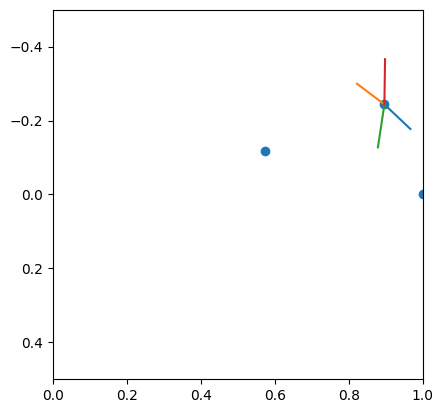

In [180]:
plt.plot([X_[0],X_[1]],[Y_[0],Y_[1]])
plt.plot([X_[0],X_[2]],[Y_[0],Y_[2]])
plt.plot([X_[0],X_[3]],[Y_[0],Y_[3]])
plt.plot([X_[0],X_[4]],[Y_[0],Y_[4]])
plt.scatter(X_[-3:],Y_[-3:])

plt.ylim(0.5,-0.5)
plt.xlim(0,1)
plt.gca().set_aspect(1)

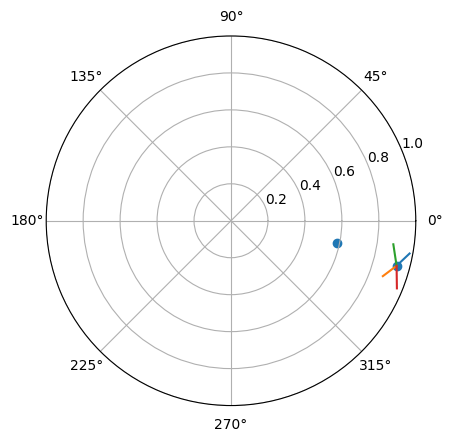

In [168]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(psis, Rs)
ax.plot([psis[0],psis[0]+d_p1/10], [Rs[0],Rs[0]+d_r1/10])
ax.plot([psis[0],psis[0]-d_p1/10], [Rs[0],Rs[0]-d_r1/10])
ax.plot([psis[0],psis[0]+d_p2/10], [Rs[0],Rs[0]+d_r2/10])
ax.plot([psis[0],psis[0]-d_p2/10], [Rs[0],Rs[0]-d_r2/10])
ax.set_rmax(1)


# r psi 사용 eigenvector

In [184]:
DR = sp.expand_trig(dr).expand()
DR = DR.subs([(r*sp.cos(psi),X),(r*sp.sin(psi),Y)]).subs([(sp.cos(psi),X/r),(sp.sin(psi),Y/r)])
DPSI = sp.expand_trig(dpsi).expand()
DPSI = DPSI.subs([(r*sp.cos(psi),X),(r*sp.sin(psi),Y)]).subs([(sp.cos(psi),X/r),(sp.sin(psi),Y/r)])

In [185]:
R = sp.sqrt(X**2+Y**2)

In [186]:
DX = DR*X/r - DPSI*Y
DY = DR*Y/r + DPSI*X

In [187]:
DX = DX.subs(r,R).simplify()
DY = DY.subs(r,R).simplify()

In [189]:
sp.dsolve([DX,DY],[X,Y])

ValueError: 
dsolve_system can solve a system of ODEs with only one independent
variable.

In [191]:
DX_x = DX.diff(X)
DX_y = DX.diff(Y)
DY_x = DY.diff(X)
DY_y = DY.diff(Y)

In [192]:
F = sp.Matrix([DX,DY])
J = F.jacobian([X,Y])

In [193]:
J

Matrix([
[        -2*X*(-X*(-X*nu*cos(alpha) - Y*nu*sin(alpha) + (X**2 + Y**2)*(X*nu*cos(alpha) + Y*nu*sin(alpha) + mu*(X**2 + Y**2)*cos(alpha) - mu*cos(alpha))) + Y*(-X*nu*sin(alpha) + Y*nu*cos(alpha) + (X**2 + Y**2)*(X*nu*sin(alpha) + 3*Y*nu*cos(alpha) - mu*(X**2 + Y**2)*sin(alpha) + mu*sin(alpha)))/2)/(X**2 + Y**2)**2 + (X*nu*cos(alpha) - X*(2*X*(X*nu*cos(alpha) + Y*nu*sin(alpha) + mu*(X**2 + Y**2)*cos(alpha) - mu*cos(alpha)) - nu*cos(alpha) + (X**2 + Y**2)*(2*X*mu*cos(alpha) + nu*cos(alpha))) + Y*nu*sin(alpha) + Y*(2*X*(X*nu*sin(alpha) + 3*Y*nu*cos(alpha) - mu*(X**2 + Y**2)*sin(alpha) + mu*sin(alpha)) - nu*sin(alpha) + (X**2 + Y**2)*(-2*X*mu*sin(alpha) + nu*sin(alpha)))/2 - (X**2 + Y**2)*(X*nu*cos(alpha) + Y*nu*sin(alpha) + mu*(X**2 + Y**2)*cos(alpha) - mu*cos(alpha)))/(X**2 + Y**2), -2*Y*(-X*(-X*nu*cos(alpha) - Y*nu*sin(alpha) + (X**2 + Y**2)*(X*nu*cos(alpha) + Y*nu*sin(alpha) + mu*(X**2 + Y**2)*cos(alpha) - mu*cos(alpha))) + Y*(-X*nu*sin(alpha) + Y*nu*cos(alpha) + (X**2 + Y**2)*(

In [112]:
A = 0.28
beta_ = 0.1
mu_ = (1+A)/2
nu_ = (1-A)/2
alpha_ = np.pi/2- beta_
print('mu,nu,alpha',mu_,nu_,alpha_)

sols =[(0.8960437942839611, -0.24371342685601233), (0.574046708038587, -0.11889747951892159)]
x_,y_ =sols[1]

mu,nu,alpha 0.64 0.36 1.4707963267948965


In [122]:

initial_guesses = np.linspace(-0.5,0.5, 100)  # 초기 추정값들의 배열
solutions = set()

def dpi_0(psi,alpha,mu,nu):
    A = -mu*np.sin(alpha) + mu*np.sin(psi)/(2*np.cos(alpha - psi)) + nu**2*np.sin(alpha + psi)*np.cos(alpha - psi)/(mu*np.cos(alpha)) + nu**2*np.sin(psi)*np.cos(alpha - psi)/(2*mu*np.cos(alpha)**2)
    return A

for guess in initial_guesses:
    solution = fsolve(dpi_0, guess,args=(alpha_,mu_,nu_))
    solutions.add(round(solution[0], 12))  # 근을 소수점 5자리로 반올림하여 추가
    
Rs = []
psis = []
def get_R(psi,alpha,mu,nu):
    R = - nu*np.cos(alpha-psi)/(mu*np.cos(alpha))
    return R
for psi in solutions:
    R = get_R(psi,alpha_,mu_,nu_)
    if R>0:
        Rs.append(R)
        psis.append(psi)
Rs,psis  = map(np.array,[Rs,psis])
xs_ = Rs*np.cos(psis)
ys_ = Rs*np.sin(psis)
sol_ =list(zip(xs_,ys_))

In [123]:
solutions

{-0.265564105579, -0.204233791727, 0.077420241723}

In [124]:
D = JJ.det()
D

0.0724918492247865

In [128]:
for i,(x_,y_) in enumerate(sol_):
    print(Rs[i],psis[i],x_,y_)
    JJ = J.subs([(X,x_),(Y,y_),(alpha,alpha_),(nu,nu_),(mu,mu_)])
    D = JJ.det()
    tri = JJ.trace()
    Delta = tri**2 -4*D
    print(D,tri,Delta)
    if D<0:
        print('Saddle')
    elif D>0:
        if tri>0:
            print('unstable')
        else:
            print('stable')
        if Delta>0:
            print('sink/source')
        else:
            print('spiral')
            
    break
    sp.pprint(JJ.eigenvects())
    

0.928596099220731 -0.265564105579 0.8960437941764667 -0.24371342680656619
-0.0116163307244046 -0.0512096128334792 0.0490877473441732
Saddle


In [130]:
print(JJ.eigenvects()[0][-1][0].T)

Matrix([[0.763798865329883, 0.645454330933478]])


In [132]:
import matplotlib.pyplot as plt

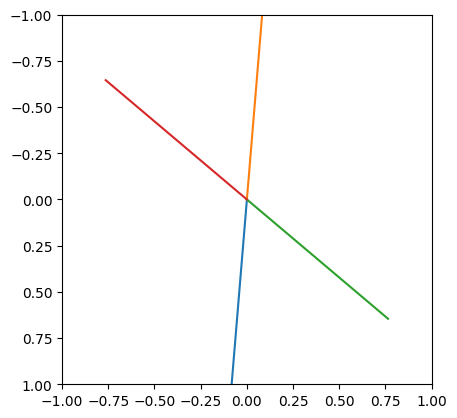

In [138]:
plt.plot((0,-0.101047489570863),(0,1.22385421431963))
plt.plot((0,+0.101047489570863),(0,-1.22385421431963))
plt.plot((0,0.763798865329883),(0,0.645454330933478))
plt.plot((0,-0.763798865329883),(0,-0.645454330933478))

plt.ylim(1,-1)
plt.xlim(-1,1)
plt.gca().set_aspect(1)



In [282]:
tri**2 -4*D

-0.289454061267004

stable
spiral


In [266]:
J = sp.Matrix([[DX_x,DX_y],[DY_x,DY_y]])
J

Matrix([
[        -2*X*(-X*(-X*nu*cos(alpha) - Y*nu*sin(alpha) + (X**2 + Y**2)*(X*nu*cos(alpha) + Y*nu*sin(alpha) + mu*(X**2 + Y**2)*cos(alpha) - mu*cos(alpha))) + Y*(-X*nu*sin(alpha) + Y*nu*cos(alpha) + (X**2 + Y**2)*(X*nu*sin(alpha) + 3*Y*nu*cos(alpha) - mu*(X**2 + Y**2)*sin(alpha) + mu*sin(alpha)))/2)/(X**2 + Y**2)**2 + (X*nu*cos(alpha) - X*(2*X*(X*nu*cos(alpha) + Y*nu*sin(alpha) + mu*(X**2 + Y**2)*cos(alpha) - mu*cos(alpha)) - nu*cos(alpha) + (X**2 + Y**2)*(2*X*mu*cos(alpha) + nu*cos(alpha))) + Y*nu*sin(alpha) + Y*(2*X*(X*nu*sin(alpha) + 3*Y*nu*cos(alpha) - mu*(X**2 + Y**2)*sin(alpha) + mu*sin(alpha)) - nu*sin(alpha) + (X**2 + Y**2)*(-2*X*mu*sin(alpha) + nu*sin(alpha)))/2 - (X**2 + Y**2)*(X*nu*cos(alpha) + Y*nu*sin(alpha) + mu*(X**2 + Y**2)*cos(alpha) - mu*cos(alpha)))/(X**2 + Y**2), -2*Y*(-X*(-X*nu*cos(alpha) - Y*nu*sin(alpha) + (X**2 + Y**2)*(X*nu*cos(alpha) + Y*nu*sin(alpha) + mu*(X**2 + Y**2)*cos(alpha) - mu*cos(alpha))) + Y*(-X*nu*sin(alpha) + Y*nu*cos(alpha) + (X**2 + Y**2)*(

In [178]:
SOL_DX = sp.solve(DX,Y)
SOL_DY = sp.solve(DY,Y)

In [192]:
SOL_DY[0]

(-5*X*nu*cos(alpha)*r**2 + X*nu*cos(alpha) - 2*mu*cos(alpha)*r**4 + 2*mu*cos(alpha)*r**2 - sqrt(33*X**2*nu**2*cos(alpha)**2*r**4 - 26*X**2*nu**2*cos(alpha)**2*r**2 + 9*X**2*nu**2*cos(alpha)**2 - 8*X**2*nu**2*r**4 + 16*X**2*nu**2*r**2 - 8*X**2*nu**2 + 12*X*mu*nu*cos(alpha)**2*r**6 - 8*X*mu*nu*cos(alpha)**2*r**4 - 4*X*mu*nu*cos(alpha)**2*r**2 + 8*X*mu*nu*r**6 - 16*X*mu*nu*r**4 + 8*X*mu*nu*r**2 + 4*mu**2*cos(alpha)**2*r**8 - 8*mu**2*cos(alpha)**2*r**6 + 4*mu**2*cos(alpha)**2*r**4))/(4*nu*(r**2 - 1)*sin(alpha))

In [196]:
print(SOL_DX)

[(-sqrt((X*nu + mu*r**2)*(r - 1)*(r + 1)*(-23*X*nu*sin(alpha)**2*r**2 - 9*X*nu*sin(alpha)**2 + 24*X*nu*r**2 + 8*X*nu + mu*sin(alpha)**2*r**4 - mu*sin(alpha)**2*r**2)) + (X*nu + mu*r**2)*(r - 1)*(r + 1)*sin(alpha))/(2*nu*(3*r**2 + 1)*cos(alpha)), (sqrt((X*nu + mu*r**2)*(r - 1)*(r + 1)*(-23*X*nu*sin(alpha)**2*r**2 - 9*X*nu*sin(alpha)**2 + 24*X*nu*r**2 + 8*X*nu + mu*sin(alpha)**2*r**4 - mu*sin(alpha)**2*r**2)) + (X*nu + mu*r**2)*(r - 1)*(r + 1)*sin(alpha))/(2*nu*(3*r**2 + 1)*cos(alpha))]


In [190]:
print(SOL_DY[1])

(-5*X*nu*cos(alpha)*r**2 + X*nu*cos(alpha) - 2*mu*cos(alpha)*r**4 + 2*mu*cos(alpha)*r**2 + sqrt(33*X**2*nu**2*cos(alpha)**2*r**4 - 26*X**2*nu**2*cos(alpha)**2*r**2 + 9*X**2*nu**2*cos(alpha)**2 - 8*X**2*nu**2*r**4 + 16*X**2*nu**2*r**2 - 8*X**2*nu**2 + 12*X*mu*nu*cos(alpha)**2*r**6 - 8*X*mu*nu*cos(alpha)**2*r**4 - 4*X*mu*nu*cos(alpha)**2*r**2 + 8*X*mu*nu*r**6 - 16*X*mu*nu*r**4 + 8*X*mu*nu*r**2 + 4*mu**2*cos(alpha)**2*r**8 - 8*mu**2*cos(alpha)**2*r**6 + 4*mu**2*cos(alpha)**2*r**4))/(4*nu*(r**2 - 1)*sin(alpha))


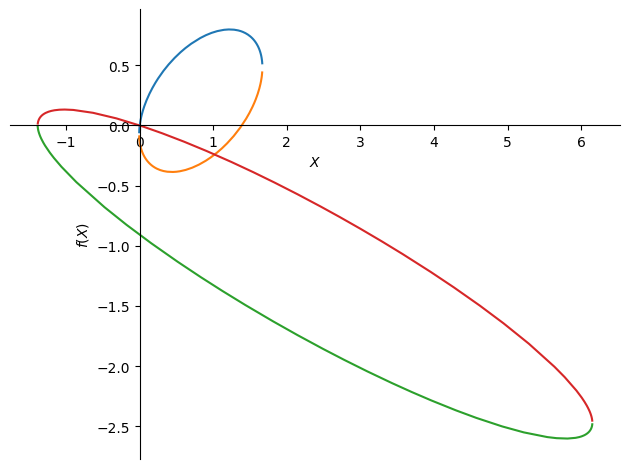

In [187]:
PLOT1 =SOL_DY[0].subs([(alpha,alpha_),(nu,nu_),(mu,mu_),(r,0.88341202)])
PLOT2 =SOL_DY[1].subs([(alpha,alpha_),(nu,nu_),(mu,mu_),(r,0.88341202)])
PLOT3 =SOL_DX[0].subs([(alpha,alpha_),(nu,nu_),(mu,mu_),(r,0.88341202)])
PLOT4 =SOL_DX[1].subs([(alpha,alpha_),(nu,nu_),(mu,mu_),(r,0.88341202)])
sp.plot(PLOT1,PLOT2,PLOT3,PLOT4,show=True)

In [147]:
drsinpsi.subs(r*sp.cos(psi),X)

X*(-mu*sin(alpha) - nu*sin(alpha + psi)*r + (mu*sin(alpha)*r + nu*sin(alpha - psi))*(r**2 + 1)/(2*r)) + (1 - r**2)*(mu*cos(alpha)*r + nu*cos(alpha - psi))*sin(psi)

In [142]:
drcospsi = sp.expand_trig(drcospsi.simplify())

In [143]:
drcospsi.collect(r*sp.cos(psi))

(1 - r**2)*(mu*cos(alpha)*r + nu*(sin(alpha)*sin(psi) + cos(alpha)*cos(psi)))*cos(psi) + (2*(mu*sin(alpha) + nu*(sin(alpha)*cos(psi) + sin(psi)*cos(alpha))*r)*r - (mu*sin(alpha)*r + nu*(sin(alpha)*cos(psi) - sin(psi)*cos(alpha)))*(r**2 + 1))*sin(psi)/2

In [130]:
sp.expand_trig(dpsi).simplify()

(-(mu*sin(alpha) + nu*sin(alpha + psi)*r)*r + (mu*sin(alpha)*r + nu*sin(alpha - psi))*(r**2 + 1)/2)/r

In [127]:
sp.expand_trig(dr)

(1 - r**2)*(mu*cos(alpha)*r + nu*(sin(alpha)*sin(psi) + cos(alpha)*cos(psi)))

In [80]:
sol_dr_r = sp.solve(dr,r)[2]
sol_dr_psi = sp.solve(dr,psi)[1]
sub_dpsi = dpsi.subs([(r,sol_dr_r)]).simplify()

In [135]:
dpsi.subs(psi,sol_dr_psi).subs([(alpha,alpha_),(nu,nu_),(mu,mu_)]).simplify()

(-(0.8*(0.980066577841242*sqrt(1 - 0.0224250999286032*r**2) - 0.0297507571143148*r)*r + 1.19400499833363)*r + (0.4*sqrt(1 - 0.0224250999286032*r**2) + 0.597002499166815*r)*(r**2 + 1))/(2*r)

In [111]:
y = sub_dpsi.subs([(alpha,alpha_),(nu,nu_),(mu,mu_)])

In [120]:
print(sub_dpsi)

-mu*sin(alpha) + mu*sin(psi)/(2*cos(alpha - psi)) + nu**2*sin(alpha + psi)*cos(alpha - psi)/(mu*cos(alpha)) + nu**2*sin(psi)*cos(alpha - psi)/(2*mu*cos(alpha)**2)


In [114]:
x = sp.symbols('x')

In [117]:
print(y)

13.3778668079579*sin(psi + 0.1)*sin(psi) + 2.67111630176927*sin(psi + 0.1)*cos(psi - 0.1) - 0.597002499166815 + 0.3*sin(psi)/sin(psi + 0.1)


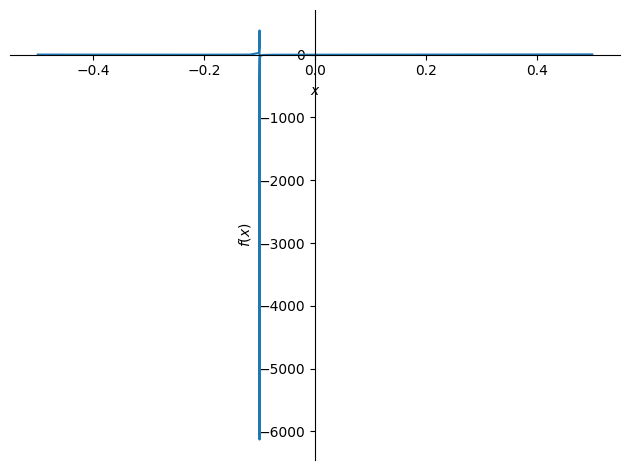

In [115]:
sp.plot(y.subs([(psi,x)]),(x,-0.5,0.5))

In [119]:
import matplotlib.pyplot as plt
import numpy as np

TypeError: loop of ufunc does not support argument 0 of type Add which has no callable sin method

In [77]:
sp.solve(dpsi.subs([(psi,sol_dr_psi)]).simplify(),r)

KeyboardInterrupt: 

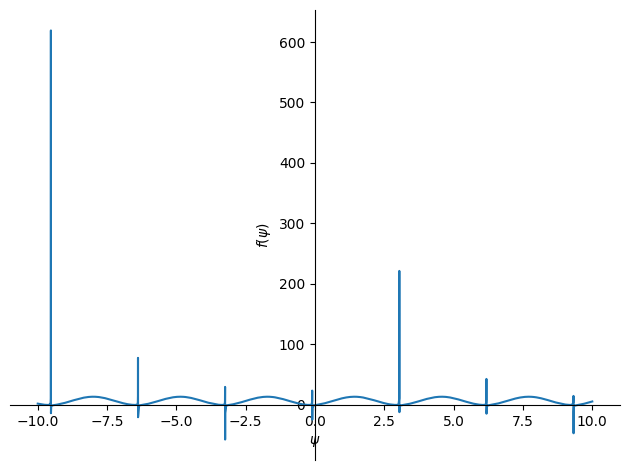

In [83]:
sp.plot(sub_dpsi.subs([(alpha,alpha_),(nu,nu_),(mu,mu_)]))

In [50]:
sp.nsolve(sub_dpsi.subs([(alpha,alpha_),(nu,nu_),(mu,mu_)]),psi)

TypeError: cannot create mpf from psi

In [ ]:
sp.solve(dpsi.subs([(beta,beta_),(nu,nu_),(mu,mu_)]),r)

In [30]:
sol_dpsi_r = sp.solve(dpsi,r)


[-1, 1, -nu*cos(alpha - psi)/(mu*cos(alpha))]

In [34]:
sol_dr_r.subs([(psi,sol_dr_psi)]).subs([(beta,beta_),(nu,nu_),(mu,mu_)])

r

[alpha + acos(-mu*cos(alpha)*r/nu), alpha - acos(-mu*cos(alpha)*r/nu) + 2*pi]